<a href="https://colab.research.google.com/github/julianovale/BB_Evolution/blob/main/0016_AluraBB_RedesNeurais_DL_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torchsummary import summary
import torch.nn as nn
import torch.nn.functional as F

# Criação dos dados

A instância criada (luas) impossibilita a separação por uma reta. Não dá para fazer uma regressão linear simples, ou usar um só perceptron.

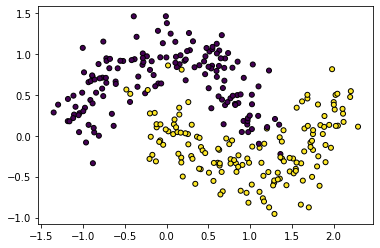

In [2]:
X1, Y1 = make_moons(n_samples = 300, noise = 0.2)
plt.scatter(X1[:,0], X1[:,1], marker='o', c=Y1, s=25, edgecolor='k')

# Criando a arquitetura da rede neural (nn.Sequential)

In [11]:
input_size = 2
hidden_size = 8
output_size = 1

###### IMPORTANTE: #######
if torch.cuda.is_available():
  device=torch.device('cuda')
else:
  device=torch.device('cpu')


net = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_size), # hidden (o tamanho da camada hidden é um hiperparâmetro, o analista que "decide")
                    nn.ReLU(), # ativação não linear
                    nn.Linear(in_features=hidden_size, out_features=output_size)) # output
net = net.to(device)
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


# Exibindo o sumário

In [12]:
summary(net, input_size=(1, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              24
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


# Foward

In [5]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
pred = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 1])


# nn.Module

Outra forma de criar arquiteturas.

## Veja:

https://pytorch.org/docs/stable/generated/torch.nn.Module.html

In [ ]:
'''
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2(x))
        
'''

In [6]:
class MinhaRede(nn.Module):
  
  def __init__(self, input_size, hidden_size, output_size):
    
    super(MinhaRede, self).__init__()

    # Definir a arquitetura
    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu   = nn.ReLU()
    self.output = nn.Linear(hidden_size, output_size)
    
  def forward(self, X):
    # Gerar uma saída a partir do X
    hidden = self.relu(self.hidden(X))
    output = self.output(hidden)

    return output


In [7]:
input_size = 2
hidden_size = 8
output_size = 1

net = MinhaRede(input_size, hidden_size, output_size)

print(X1.shape)
tensor = torch.from_numpy(X1).float()
pred = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 1])


# Subindo informações para a GPU

In [8]:
if torch.cuda.is_available():
  device=torch.device('cuda')
else:
  device=torch.device('cpu')

print(device)

cuda


In [10]:
input_size = 2
hidden_size = 8
output_size = 1

net = MinhaRede(input_size, hidden_size, output_size)
net = net.to(device) # mandar para a GPU

print(X1.shape)
tensor = torch.from_numpy(X1).float()
tensor = tensor.to(device) # mandar para a GPU
pred = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 1])
